# Madrid Properties Predictive Model

## Abstract
The real estate industry is one of the industries that generates the highest income worldwide. In Spain, this industry generated a GDP of €50,000 million, indirectly and directly employing 1.3 million people. Madrid, a large European city, is no stranger to this. The considerable investment attractiveness for both local and foreign private entities, together with the purchase and sale of assets by the residents of this city, make creating a predictive model for properties in Madrid extremely attractive for any company that works within the sector.


![jorge-fernandez-salas-ChSZETOal-I-unsplash](jorge-fernandez-salas-ChSZETOal-I-unsplash.jpg)


### 1. Objective

Build a predictive price property model based on information obtained from a dataset with real property values in the Spanish capital.



### 2. Commercial Context

The model is going to be very attractive for its commercialization. On one hand, it serves as a marketing attraction tool for sellers who want to know the price of their property in exchange of leaving their contact information. This information can then be used for targeted promotion of the real estate asset.

Secondly, the model can be a valuable tool for industry professionals involved in property valuation. It provides a preliminary estimate of a property's value, allowing professionals to assess its worth before conducting on-site visits.

Lastly, the model can empower buyers by offering insights into the value of properties they are interested in purchasing. This helps them make informed decisions and ensures they have a better understanding of the properties they are considering.

### 3. Hypotheses

1. The value of the property is determined by its location.
2. Having built-in wardrobes increases the price.
3. If the property has a pool, the price increases considerably.
4. The price of exterior properties is 30% higher than interior properties.
5. Properties with an elevator increase the price by 20%.
6. Having balconies significantly increases the price.
7. Having more rooms increases the price of the property.
8. The size of the property determines its price.

### 4. Analytical Context

Variables:

1. id: property id
2. title: propertys' title on the website
3. subtitle: description about the property on the website
4. sq_mt_built: build squared meters
5. sq_mt_useful: build squared meters except for the walls 
6. n_rooms: number of rooms
7. n_bathrooms: number of bathrooms
8. n_floors: how many levels the property has.
9. sq_mt_allotment: squared meters in total
10. latitude: location
11. longitude: location
12. raw_address: exact property's address
13. is_exact_address_hidden: hidden information or not
14. street_name: street name
15. street_number: building's number
16. portal: in case there's an appartment complex would have a portal number
17. floor: level of the floor
18. is_floor_under: for basement floor
19. door: doors number
20. neighborhood_id: Madrid assigned id by neighborhood
21. operation: rento or sale
22. rent_price: price for rent
23. rent_price_by_area: rent by m2
24. is_rent_price_known: additional information
25. buy_price: cost of the property (target variable)
26. buy_price_by_area: price by m2
27. is_buy_price_known: additional information
28. house_type_id: apartment, house, building
29. is_renewal_needed: renewal for the property
30. is_new_development: new construction
31. built_year: year of construction
32. has_central_heating: common heating for the whole building
33. has_individual_heating: individual heating
34. are_pets_allowed: for rent properties
35. has_ac: air conditioner
36. has_fitted_wardrobes: wardrobes that cannot be moved
37. has_lift: lift
38. is_exterior: exterior property
39. has_garden:  yes or no
40. has_pool: yes or no
41. has_terrace: yes or no
42. has_balcony: yes or no
43. has_storage_room: large storage room
44. is_furnished: yes or no
45. is_kitchen_equipped: yes or no
46. is_accessible: yes or no
47. has_green_zones: yes or no
48. energy_certificate: certificato to know consume 
49. has_parking: yes or no
50. has_private_parking: yes or no
51. has_public_parking: yes or no
52. is_parking_included_in_price: yes or no
53. parking_price: price of parking
54. is_orientation_north: yes or no
55. is_orientation_west: yes or no
56. is_orientation_south: yes or no
57. is_orientation_east: yes or no

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [116]:
madrid_df = pd.read_csv('https://raw.githubusercontent.com/juanarangio/madrid_houses/main/houses_Madrid.csv', index_col=0)

madrid_df

id  ... is_orientation_east
0      21742  ...               False
1      21741  ...                 NaN
2      21740  ...                 NaN
3      21739  ...               False
4      21738  ...                True
...      ...  ...                 ...
21737      5  ...                 NaN
21738      4  ...                True
21739      3  ...                 NaN
21740      2  ...               False
21741      1  ...                 NaN

[21742 rows x 57 columns]

In [117]:
### Deleting not important columns. This was decided as consequence of previous data exploration.

madrid_df = madrid_df.drop(columns=['is_exact_address_hidden', 'street_number', 'portal', 'is_floor_under', 'door', 'operation', 'rent_price_by_area','is_buy_price_known', 'are_pets_allowed', 'has_ac', 'energy_certificate', 'has_public_parking', 'has_public_parking', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east', 'latitude', 'longitude', 'is_rent_price_known','is_furnished', 'is_kitchen_equipped', 'has_private_parking', 'subtitle', 'raw_address', 'street_name', 'sq_mt_useful', 'sq_mt_allotment', 'n_floors' ])

In [118]:
madrid_df.drop_duplicates(inplace=True)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 0 to 21741
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   sq_mt_built                   21616 non-null  float64
 3   n_rooms                       21742 non-null  int64  
 4   n_bathrooms                   21726 non-null  float64
 5   floor                         19135 non-null  object 
 6   neighborhood_id               21742 non-null  object 
 7   rent_price                    21742 non-null  int64  
 8   buy_price                     21742 non-null  int64  
 9   buy_price_by_area             21742 non-null  int64  
 10  house_type_id                 21351 non-null  object 
 11  is_renewal_needed             21742 non-null  bool   
 12  is_new_development            20750 non-null  object 
 13  b

## Data Exploration

### 5. Load and deleting columns

After carefully reviewing the column types and null values, it was decided to delete those columns that could interfere with the exploration and data modeling process. Additionally, there are some columns that are not important for my predictive model.

In [119]:
madrid_df.isnull().sum()

id                                  0
title                               0
sq_mt_built                       126
n_rooms                             0
n_bathrooms                        16
floor                            2607
neighborhood_id                     0
rent_price                          0
buy_price                           0
buy_price_by_area                   0
house_type_id                     391
is_renewal_needed                   0
is_new_development                992
built_year                      11742
has_central_heating              8134
has_individual_heating           8134
has_fitted_wardrobes             8343
has_lift                         2386
is_exterior                      3043
has_garden                      20186
has_pool                        16571
has_terrace                     12194
has_balcony                     18421
has_storage_room                14044
is_accessible                   17668
has_green_zones                 17685
has_parking 

In [120]:
##Dropping 126 rows with no sqm2 as there's no info in the title about the sqm2. 

missing_sq_mt_built = madrid_df[madrid_df['sq_mt_built'].isna()]

for title in missing_sq_mt_built['title']:
    print(title)

 Casa o chalet independiente en venta en calle Amorebieta
 Casa o chalet independiente en venta en Valdemarín
 Casa o chalet independiente en venta en Valdemarín
 Casa o chalet independiente en venta en Valdemarín
 Casa o chalet independiente en venta en El Plantío
 Casa o chalet independiente en venta en El Plantío
 Casa o chalet independiente en venta en El Plantío
 Casa o chalet independiente en venta en Urb. VALDEMARIN, Valdemarín
 Casa o chalet independiente en venta en El Plantío
 Casa o chalet independiente en venta en Valdemarín
 Casa o chalet independiente en venta en calle Amorebieta, 25
 Casa o chalet independiente en venta en Aravaca
 Casa o chalet independiente en venta en Amorebieta
 Casa o chalet independiente en venta en Valdemarín
 Casa o chalet independiente en venta en AMOREBIETA
 Casa o chalet en venta en Valdemarín
 Casa o chalet independiente en venta en calle turégano, 1
 Casa o chalet independiente en venta en Urb. LA FLORIDA, El Plantío
 Casa o chalet independi

In [121]:
missing_housetypeid = madrid_df[madrid_df['house_type_id'].isna()]

for title in missing_housetypeid['title']:
  print(title)

Estudio en venta en calle Laguna del Marquesado
Estudio en venta en calle Augustóbriga
Estudio en venta en calle del Grafito, Madrid
Estudio en venta en San Andrés
Estudio en venta en calle Augustóbriga
Estudio en venta en carretera de Villaverde a Vallecas, 293
Estudio en venta en calle Cerro del Murmullo
Estudio en venta en Cerro del Murmullo
Estudio en venta en avenida Ensanche de Vallecas
Estudio en venta en calle del puerto de pozazal, 37
Estudio en venta en carretera de Villaverde a Vallecas
Estudio en venta en puerto de pozazal
Estudio en venta en calle de Jesús del Pino
Estudio en venta en alameda del Valle, 20
Estudio en venta en calle Cerro del Murmullo
Estudio en venta en carretera Villaverde a Vallecas, 293
Estudio en venta en calle Cerro del Murmullo
Estudio en venta en calle de Puentelarra, 7
Estudio en venta en calle de Ferroviarios, 86
Estudio en venta en calle Marcelo Usera, 55
Estudio en venta en calle Ordicia, 25
Estudio en venta en calle Socuéllamos
Estudio en venta

In [122]:
##I see that the majority of the missing house_type_id are houses and studios. I apply the condition str.contains to select the correct house type.

Est = madrid_df[(madrid_df['house_type_id'].isna()) & (madrid_df['title'].str.contains('Estudio', regex=True))]
Rust = madrid_df[(madrid_df['house_type_id'].isna()) & (madrid_df['title'].str.contains('Finca|Casa de pueblo', regex=True))]

madrid_df.loc[Rust.index, 'house_type_id']='HouseType 2: Casa o chalet'
madrid_df.loc[Est.index, 'house_type_id']="HouseType 1: Pisos"

In [123]:
madrid_df.isnull().sum()

id                                  0
title                               0
sq_mt_built                       126
n_rooms                             0
n_bathrooms                        16
floor                            2607
neighborhood_id                     0
rent_price                          0
buy_price                           0
buy_price_by_area                   0
house_type_id                       0
is_renewal_needed                   0
is_new_development                992
built_year                      11742
has_central_heating              8134
has_individual_heating           8134
has_fitted_wardrobes             8343
has_lift                         2386
is_exterior                      3043
has_garden                      20186
has_pool                        16571
has_terrace                     12194
has_balcony                     18421
has_storage_room                14044
is_accessible                   17668
has_green_zones                 17685
has_parking 

In [124]:
print(madrid_df['parking_price'].value_counts())
print(madrid_df['house_type_id'].value_counts())

0.0        7117
30000.0      60
25000.0      48
20000.0      46
15000.0      42
           ... 
13750.0       1
19900.0       1
69000.0       1
48500.0       1
110.0         1
Name: parking_price, Length: 84, dtype: int64
HouseType 1: Pisos            18093
HouseType 2: Casa o chalet     1941
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: house_type_id, dtype: int64


In [125]:
##For missing floor we add 1 as it is the avg.

madrid_df['floor'].fillna(1, inplace=True)

In [126]:
print(madrid_df['is_parking_included_in_price'].count())
print(madrid_df['parking_price'].count())

7719
7719


In [127]:
## I have noticed that some properties have parking price included in the pricing so I extract the parking price to the property value. In addition as we see in the cell above, both is_parking_in_price and parking_price have the same rows, so we deduct that we if there's a value in parking_price we should extract it

madrid_df['buy_price'] = madrid_df.apply(lambda row: row['buy_price'] - row['parking_price'] if row['parking_price'] > 0 else row['buy_price'], axis=1)

In [128]:
## I drop null values in sqmt and n_bathrooms
madrid_df.dropna(subset=['sq_mt_built', 'n_bathrooms'], inplace=True)

In [129]:
madrid_df.isnull().sum()

id                                  0
title                               0
sq_mt_built                         0
n_rooms                             0
n_bathrooms                         0
floor                               0
neighborhood_id                     0
rent_price                          0
buy_price                           0
buy_price_by_area                   0
house_type_id                       0
is_renewal_needed                   0
is_new_development                987
built_year                      11663
has_central_heating              8040
has_individual_heating           8040
has_fitted_wardrobes             8275
has_lift                         2259
is_exterior                      2913
has_garden                      20155
has_pool                        16537
has_terrace                     12145
has_balcony                     18301
has_storage_room                13985
is_accessible                   17536
has_green_zones                 17543
has_parking 

In [130]:
## I drop columns that have high nulls and, based on my knowledge in the subject, I know it won't influence the price.

madrid_df.drop(columns=[ 'has_central_heating', 'has_individual_heating', 'has_fitted_wardrobes', 'is_parking_included_in_price','parking_price', 'has_storage_room'], inplace=True)

### 6. Target Variable

As my target variable is price I explore the column to understand and see if there's a row missing or there's a value = 0. This could affect highly to my model. Therefore I start with the exploration. 

In [131]:
## We delete properties lower than 30000 as we considere them outliers as well as if they are equal to 0

madrid_df = madrid_df[madrid_df['buy_price']!=0]
madrid_df = madrid_df[madrid_df['buy_price']>30000]

### 7. Graphs to understand the dataset

The objectives of the following charts are:

1.   View outliers in terms of number of rooms and price.
2.   Price distribution using a histogram.
3.   Analyze if the price is correlated with an increase in rooms and bathrooms.
4.   Evaluate if there are outliers in terms of number of rooms, average price per square meter of the property, and highlighting whether the property is ready to move in or needs renovation.
5.   Price distribution according to the typology of the housing.
6.   Analyze where the most expensive properties are located with a value of €7500 per square meter. It is important to see if those premium areas are the ones with the most properties above €7500 per square meter.
7.   Finally, evaluate if the price is correlated with the square meters and the number of rooms.

In [132]:
## It's important to have a clean column in order to review metrics

madrid_df[['buy_price', 'buy_price_by_area']] = madrid_df[['buy_price', 'buy_price_by_area']].apply(pd.to_numeric, errors='coerce')
madrid_df[['buy_price', 'buy_price_by_area']] = madrid_df[['buy_price', 'buy_price_by_area']].astype(float).round(0).astype(pd.Int32Dtype(), errors='ignore')

In [133]:
##We can see some correlation as n_rooms increases n_bathrooms also increases and mean_price.

pivot_bathrooms = pd.pivot_table(madrid_df, values='buy_price', index='n_rooms', columns='n_bathrooms', aggfunc='mean', fill_value=0)

pivot_bathrooms

n_bathrooms            1.0             2.0   ...      13.0       14.0
n_rooms                                      ...                     
0             197127.335897   373788.083333  ...       0.0        0.0
1             264067.016752   408830.426087  ...       0.0        0.0
2             220858.377283   482681.843779  ...       0.0        0.0
3             207317.243975   483817.985307  ...       0.0        0.0
4              332302.94186   556479.319742  ...       0.0        0.0
5                  680562.5   755234.333333  ...       0.0        0.0
6                 1179150.0  1138057.692308  ...       0.0        0.0
7                  570000.0  1105259.259259  ...       0.0  1300000.0
8            2126666.666667       1777200.0  ...       0.0        0.0
9                       0.0       1209000.0  ...       0.0        0.0
10                      0.0  1666666.666667  ...       0.0        0.0
11                      0.0             0.0  ...       0.0        0.0
12                      0.0       1350000.0  ...       0.0        0.0
13                      0.0       2000000.0  ...  715000.0        0.0
14                      0.0             0.0  ...       0.0        0.0
15                      0.0       2200000.0  ...       0.0        0.0
18                      0.0             0.0  ...       0.0        0.0
24                      0.0             0.0  ...       0.0        0.0

[18 rows x 13 columns]

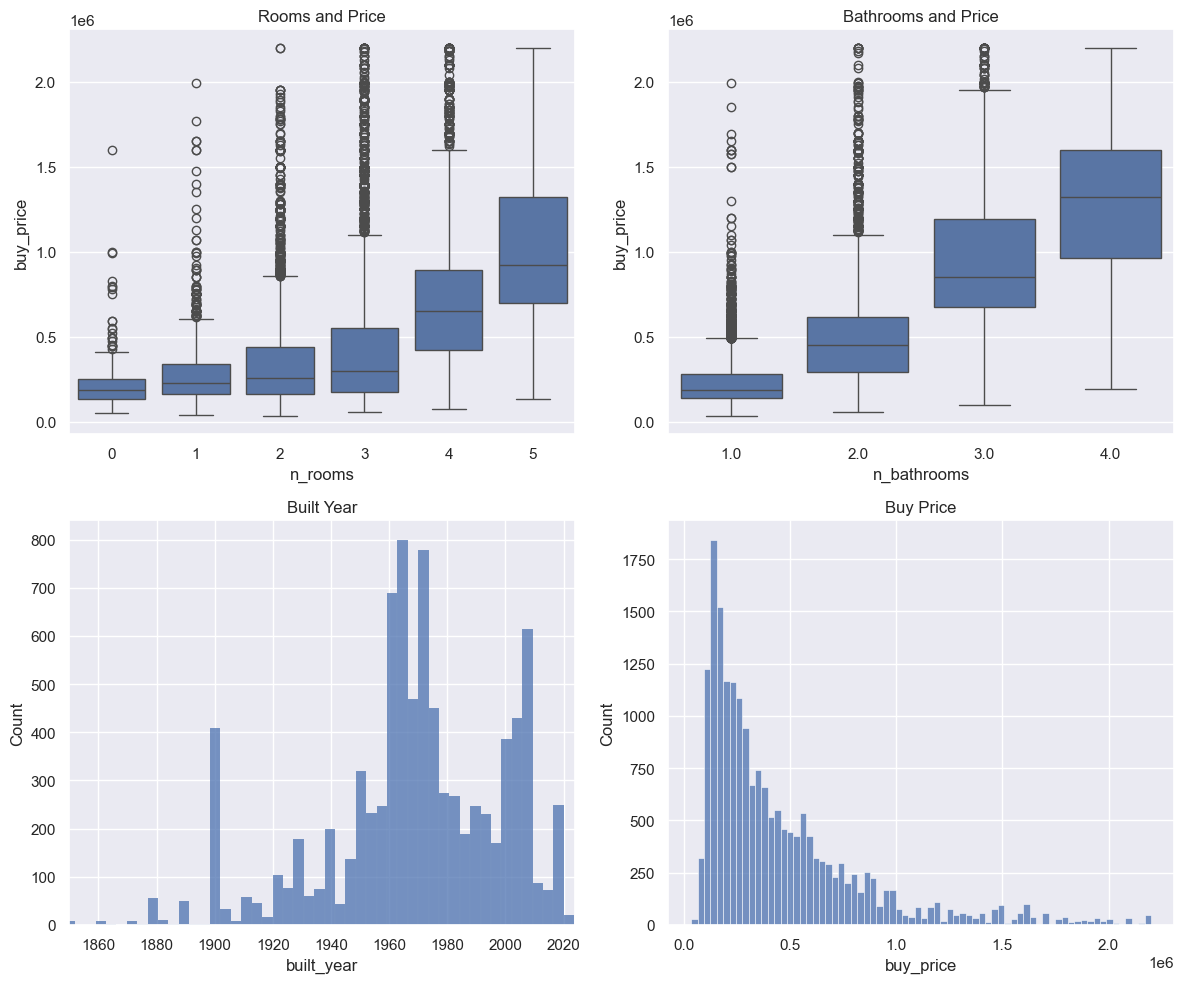

In [144]:
#First charts to see correlation and find potential outliers

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=madrid_df, x='n_rooms', y='buy_price', ax=axs[0, 0])
axs[0, 0].set_title('Rooms and Price')

sns.boxplot(data=madrid_df, x='n_bathrooms', y='buy_price', ax=axs[0, 1])
axs[0, 1].set_title('Bathrooms and Price')

x_range = (1850, 2024)
sns.histplot(data=madrid_df, x='built_year', ax=axs[1, 0])
axs[1, 0].set_title('Built Year')
axs[1, 0].set_xlim(x_range)

sns.histplot(data=madrid_df, x='buy_price', ax=axs[1, 1])
axs[1, 1].set_title('Buy Price')

plt.tight_layout()
plt.show()

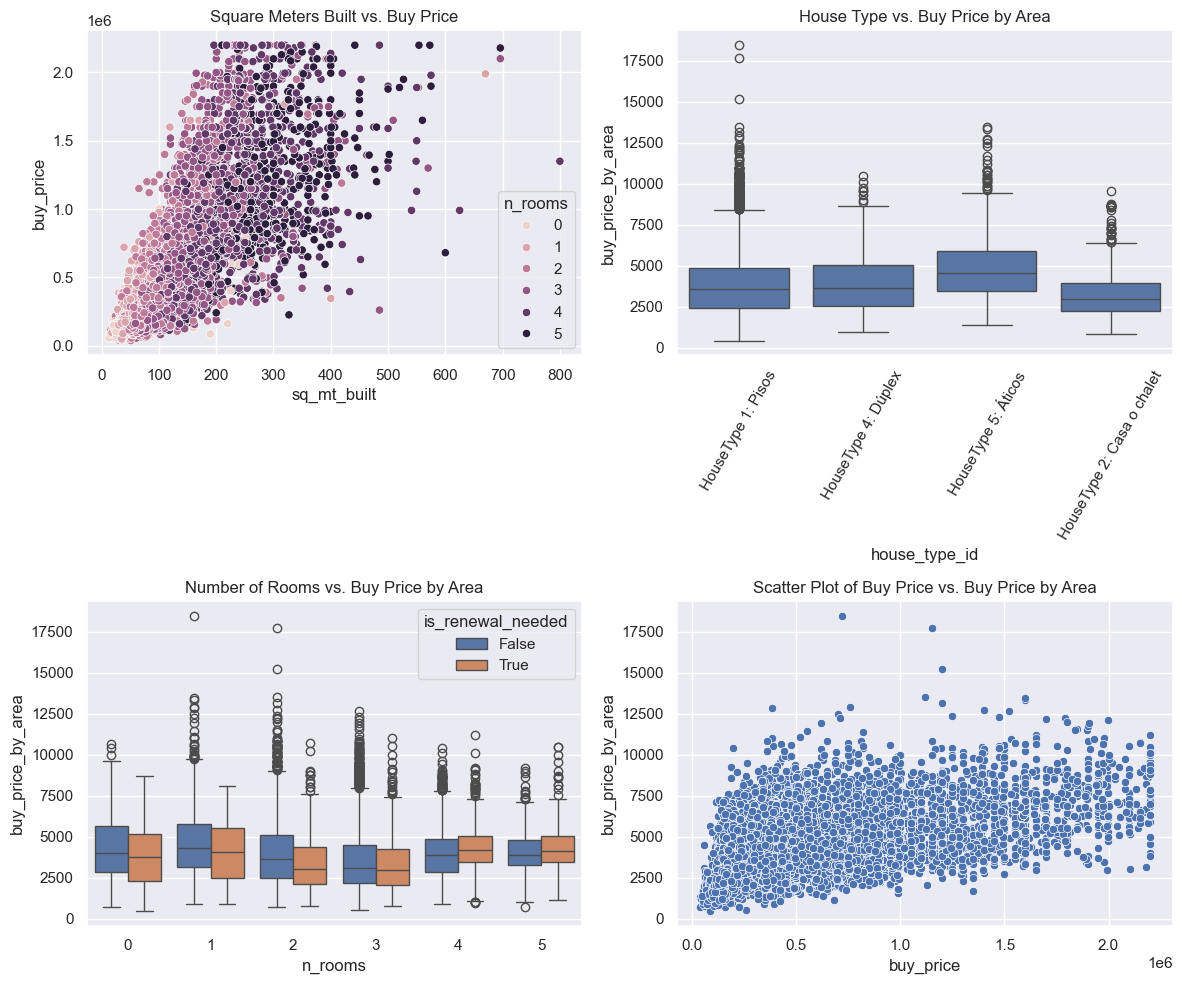

In [145]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=madrid_df, x='sq_mt_built', y='buy_price', hue='n_rooms', ax=axs[0, 0])
axs[0, 0].set_title('Square Meters Built vs. Buy Price')

ax = sns.boxplot(data=madrid_df, x='house_type_id', y='buy_price_by_area', ax=axs[0, 1])
ax.set_title('House Type vs. Buy Price by Area')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

sns.boxplot(data=madrid_df, x='n_rooms', y='buy_price_by_area', hue='is_renewal_needed', ax=axs[1, 0])
axs[1, 0].set_title('Number of Rooms vs. Buy Price by Area')

sns.scatterplot(data=madrid_df, x='buy_price', y='buy_price_by_area', ax=axs[1,1])
axs[1,1].set_title('Scatter Plot of Buy Price vs. Buy Price by Area')

plt.tight_layout()
plt.show()

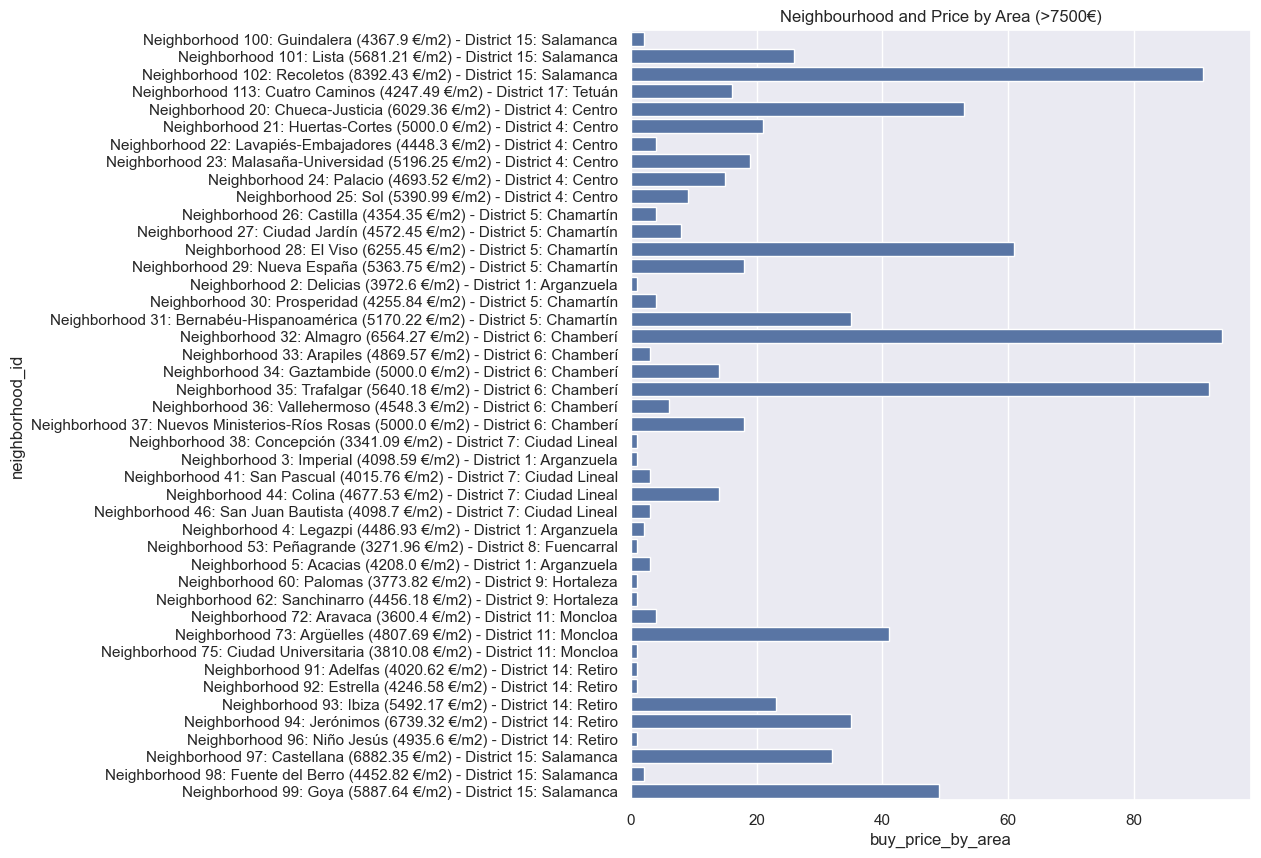

In [146]:
##Plot to identify if there might be a higher price in a premium area

higher_7500 = madrid_df[madrid_df['buy_price_by_area'] > 7500]
sum_higher_7500 = higher_7500.groupby('neighborhood_id')['buy_price_by_area'].count().reset_index()

plt.figure(figsize=(8, 10))

ax = sns.barplot(data=sum_higher_7500, x='buy_price_by_area', y='neighborhood_id', orient='h')
ax.set_title('Neighbourhood and Price by Area (>7500€)')

plt.show()

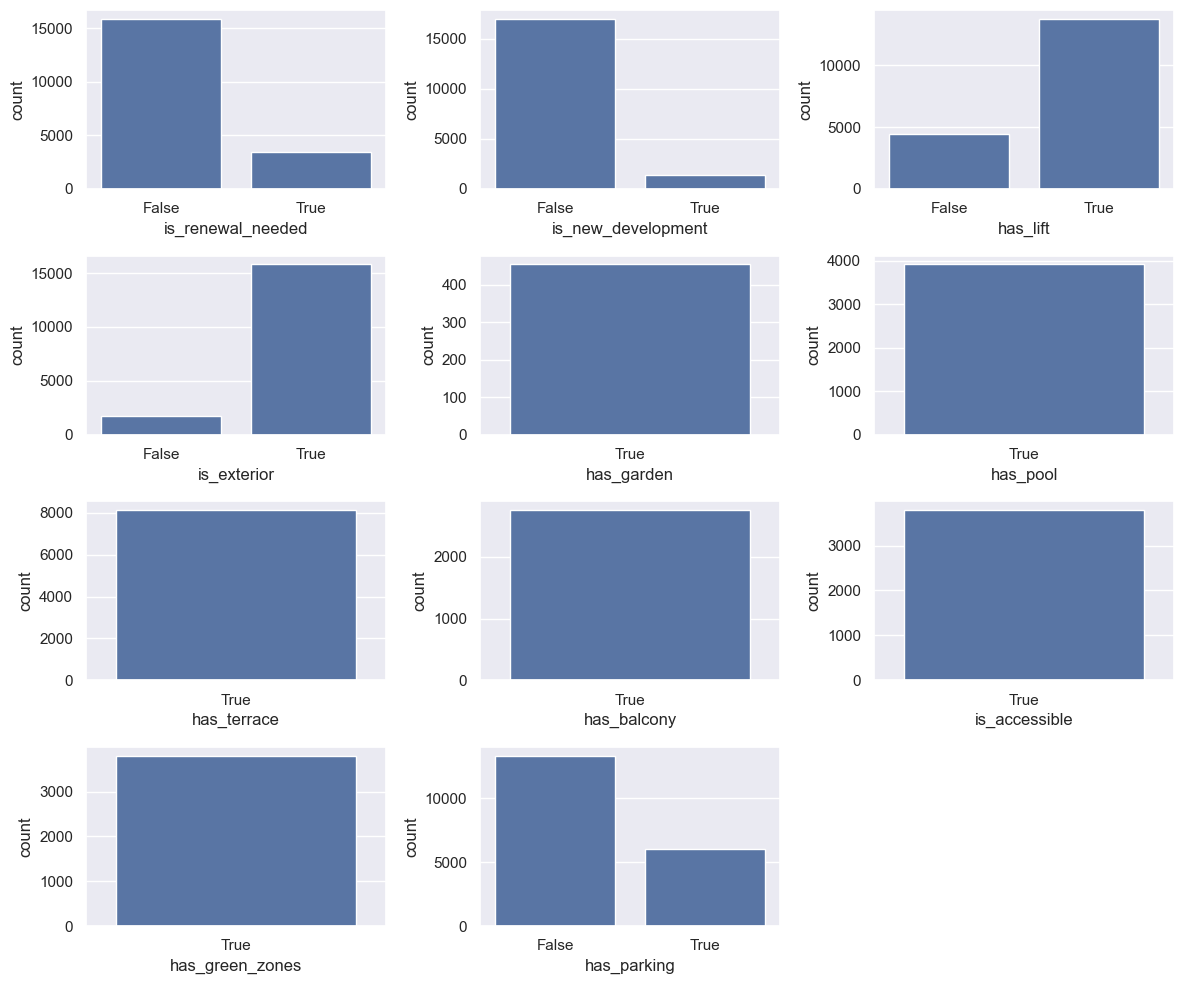

In [147]:
columns_to_view = ['is_renewal_needed', 'is_new_development', 'has_lift', 'is_exterior', 'has_garden',
                   'has_pool', 'has_terrace', 'has_balcony', 'is_accessible', 'has_green_zones', 'has_parking']

fig, axes = plt.subplots(4, 3, figsize=(12, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_view):
    sns.countplot(data=madrid_df, x=column, ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(len(columns_to_view), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 8. Cleaning Outliers

As it is known that outliers can cause models to underperform due to overfitting and underfitting, these outliers will be removed.

In [148]:
n_rooms_madriddf = madrid_df[madrid_df['n_rooms']>6]
n_bathroomsmadriddf= madrid_df[madrid_df['n_bathrooms']>5]

print(n_rooms_madriddf.shape)
print(n_bathroomsmadriddf.shape)

(0, 23)
(0, 23)


In [149]:
madrid_df = madrid_df[(madrid_df['n_rooms'] < 6) & (madrid_df['n_bathrooms'] < 5)]

In [150]:
madrid_df['buy_price'].describe()

count          19333.0
mean     457910.093829
std      388734.365203
min            36000.0
25%           185000.0
50%           325000.0
75%           590000.0
max          2200000.0
Name: buy_price, dtype: Float64

In [151]:
Q1 = madrid_df['buy_price'].quantile(0.25)
Q3 = madrid_df['buy_price'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = madrid_df[(madrid_df['buy_price'] < lower_bound) | (madrid_df['buy_price'] > upper_bound)]

outliers

id  ... has_parking
3848   17894  ...       False
3849   17893  ...        True
3980   17762  ...       False
4005   17737  ...        True
4062   17680  ...       False
...      ...  ...         ...
20112   1630  ...       False
20138   1604  ...       False
21357    385  ...        True
21378    364  ...       False
21665     77  ...        True

[89 rows x 23 columns]

In [152]:
madrid_df = madrid_df[(madrid_df['buy_price'] >= lower_bound) & (madrid_df['buy_price'] <= upper_bound)]

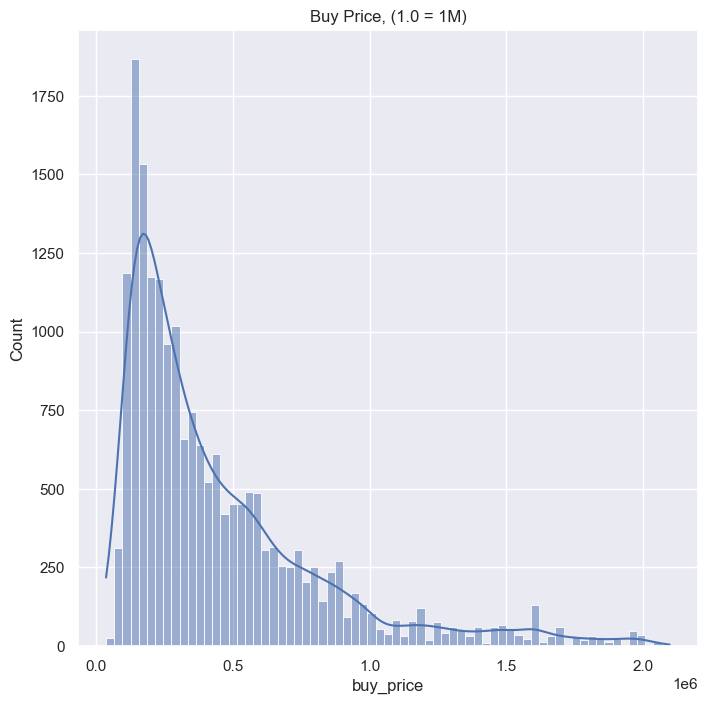

In [161]:
plt.figure(figsize=(8,8))

ax = sns.histplot(data=madrid_df, x='buy_price', kde=True)
ax.set_title('Buy Price, (1.0 = 1M)')

plt.show()

## Main Insights from the Exploration

The exploration has been very important for understanding the data. With experience in the real estate market in Madrid, I can comment on some points to clarify.

One thing that stands out is the number of rooms and square meters of the property. As seen in the exploration, the headlines mention that they are houses or chalets. This means that they are quite large properties, and we may even find entire buildings since this is a product that is also marketed in Madrid.

On the other hand, when we look at the boxplots, we found possible outliers. It was decided to drop them as it can damage the model's accuracy and make it underperform.

Exploring those properties above €7500 per square meter, it was noticed that almost all of them are concentrated in the most premium neighborhoods of Madrid, with some in middle-class neighborhoods that possibly have that price due to their size.

In addition, the price distribution in the histogram is right-skewed, showing the majority of values between 100,000 and 200,000.

Also it was seen that there are some columns that contain null values which are not convinient for the model. These columns with many nulls and seeing, through experience, that don't have much weight I decided to drop them.

Finally, there is correlation between price and square meters, number of rooms, and bathrooms, which directs to the conclusion that this dataset is robust and I can take it into production.

## Data Modelling

### 9. First Modelling

In [162]:
def replace_true_false(df, columns):
  if df is not None and isinstance(df, pd.DataFrame):
    df[columns] = df[columns].replace({True:1 , False:0})
    return df
  else:
    print('Invalid DataFrame')
    return None

madrid_df = replace_true_false(madrid_df,columns_to_view)

In [163]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19244 entries, 0 to 21741
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19244 non-null  int64  
 1   title               19244 non-null  object 
 2   sq_mt_built         19244 non-null  float64
 3   n_rooms             19244 non-null  int64  
 4   n_bathrooms         19244 non-null  float64
 5   floor               19244 non-null  object 
 6   neighborhood_id     19244 non-null  object 
 7   rent_price          19244 non-null  int64  
 8   buy_price           19244 non-null  Int32  
 9   buy_price_by_area   19244 non-null  Int32  
 10  house_type_id       19244 non-null  object 
 11  is_renewal_needed   19244 non-null  int64  
 12  is_new_development  18326 non-null  float64
 13  built_year          8795 non-null   float64
 14  has_lift            18143 non-null  float64
 15  is_exterior         17506 non-null  float64
 16  has_

In [164]:
madrid_df['floor'].value_counts()

1                       4201
2                       3275
3                       2821
4                       2150
Bajo                    2080
1                       1303
5                       1201
6                        843
7                        520
8                        301
Entreplanta exterior     225
9                        168
Semi-sótano exterior      53
Semi-sótano interior      36
Entreplanta interior      31
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: floor, dtype: int64

In [165]:
##Floors to numeric

floor_to_replace = {'Bajo':0, 'Entreplanta exterior': 1, 'Semi-sótano exterior': -1, 'Semi-sótano interior': -1, 'Entreplanta interior': 1, 'Sótano interior': -1,'Sótano': -1, 'Sótano exterior': -1,
                    'Entreplanta': 1, 'Semi-sótano': -1}

madrid_df['floor'] = madrid_df['floor'].replace(floor_to_replace)

madrid_df['floor'] = madrid_df['floor'].astype(float)

### 10. First Modelling Results

During the modeling phase, the objective was to convert all variables into numerical values. The purpose of this was to ensure that the majority of the columns were numerical rather than categorical, resulting in a cleaner dataset for the model.

It is important to highlight that initially, the names of the neighbors were converted into numbers. However, after experimenting with categorical data for this column, it was discovered that the model performed better when dummy encoding it was applied to it.

Additionally, True and False values were replaced by to 1 and 0, respectively. Finally, the property's level number was converted into numerical values.

This process involved an extensive work of trial and error to achieve the resulting goal of reducing the number of columns.

In [166]:
##Drop columns that won't need, also built_year due to high number of nulls and buy_price_by_Area as can influence my model

madrid_df = madrid_df.drop(columns=['id', 'title', 'buy_price_by_area', 'built_year'])

madrid_df.shape

(19244, 19)

Text(0.5, 1.0, 'Correlation Heatmap with Price')

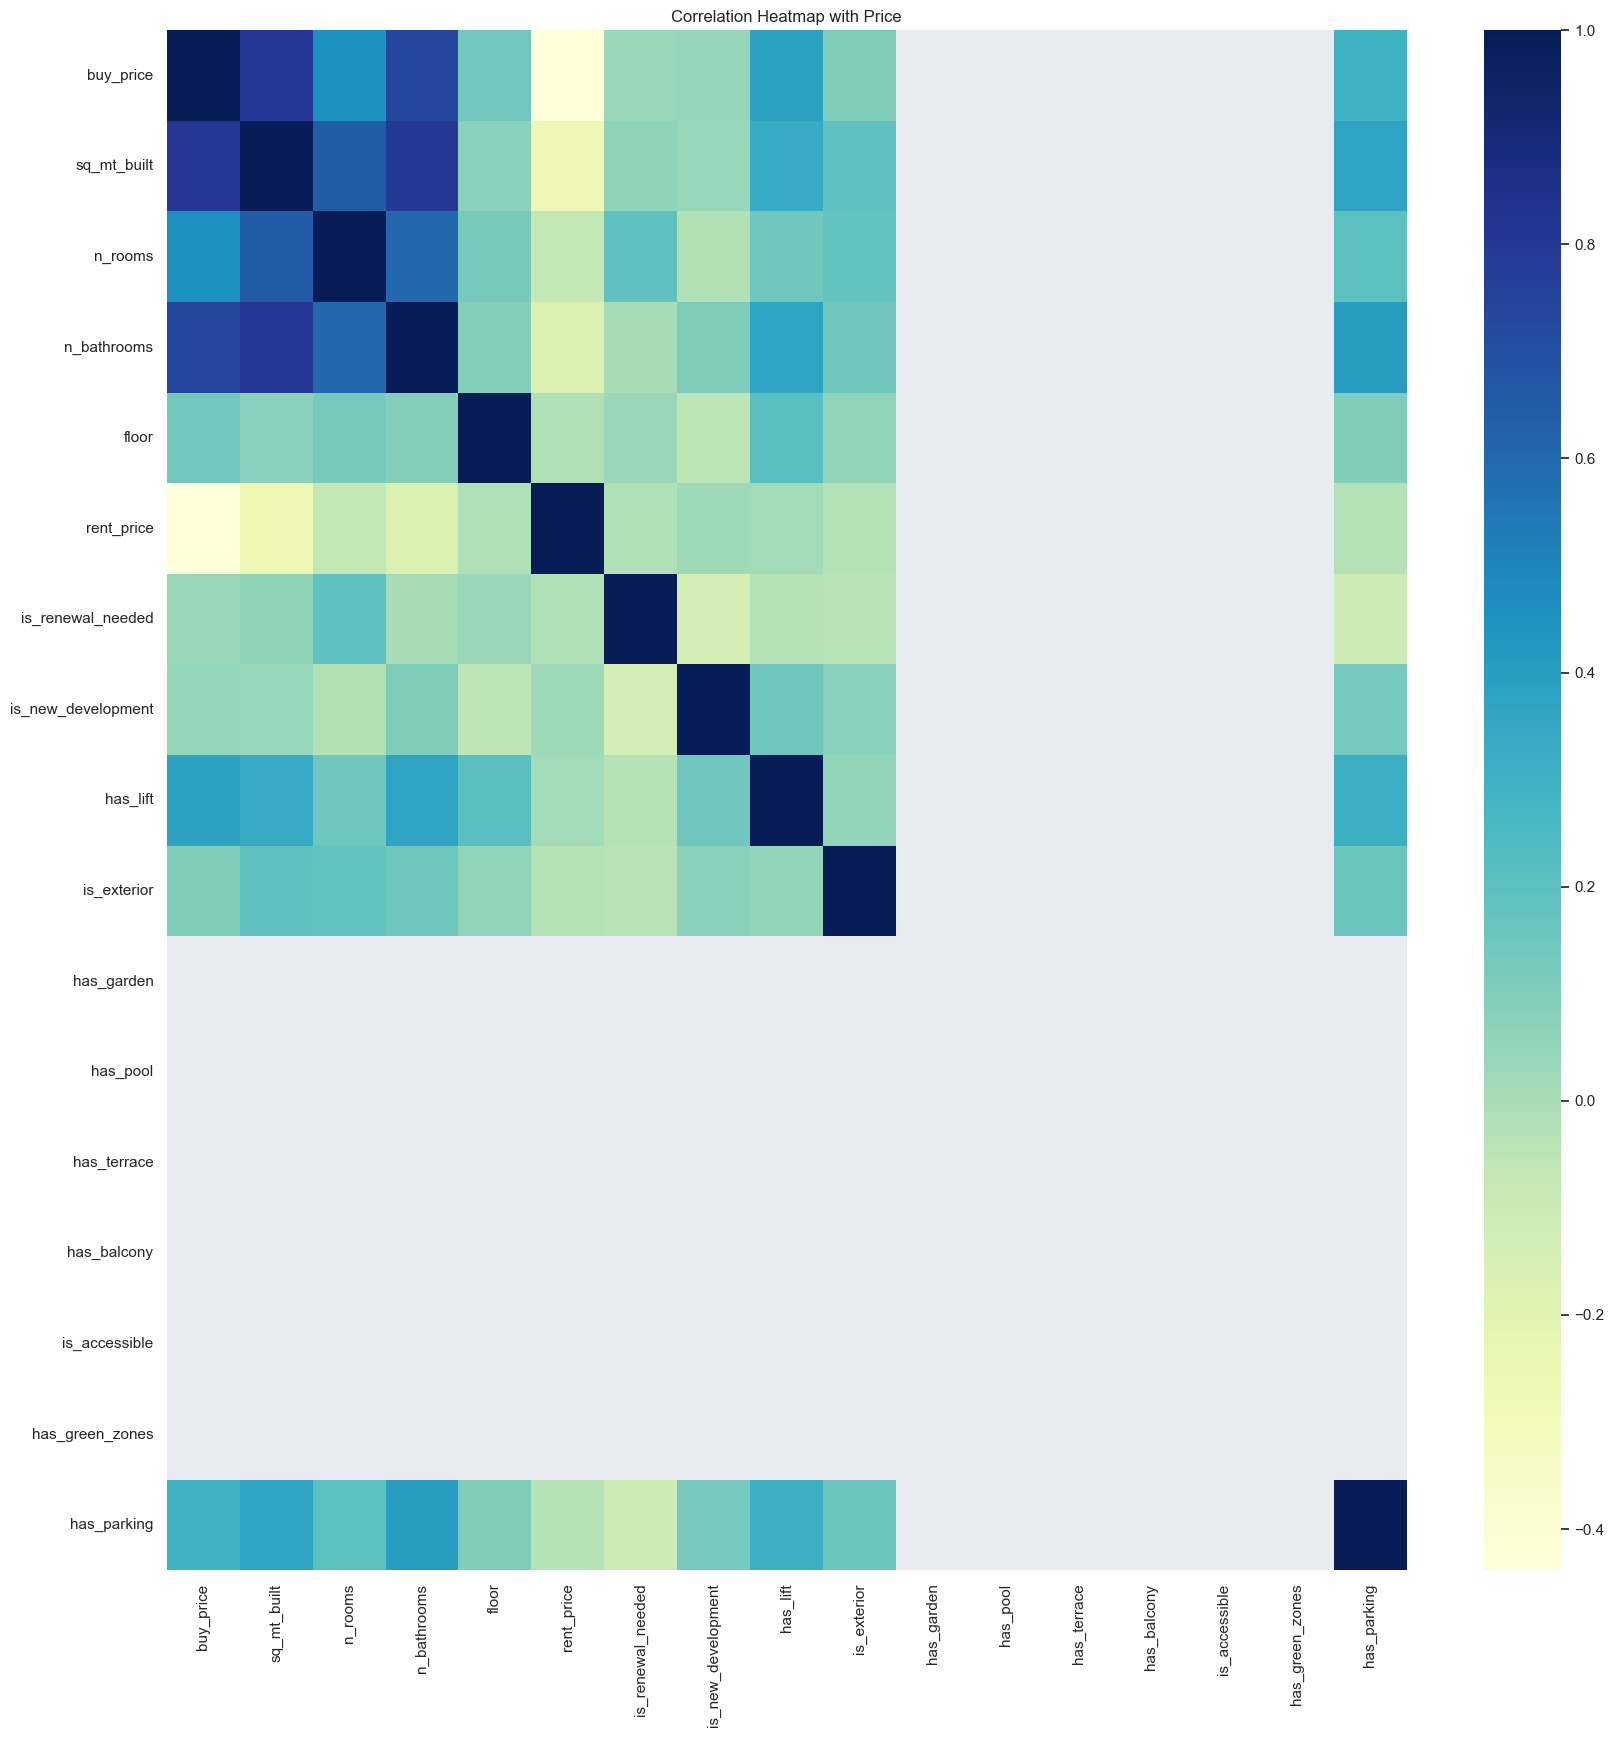

In [168]:
##As my dataframe has 147 columns it won't be clear to show all columns, so I select the columns that haven't been encode. 

selected_columns = ['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'rent_price', 'is_renewal_needed','is_new_development', 'has_lift', 'is_exterior', 'has_garden', 'has_pool', 'has_terrace','has_balcony', 'is_accessible', 'has_green_zones', 'has_parking']

corr_matrix = madrid_df[selected_columns].corr()

sns.heatmap(corr_matrix, cmap='YlGnBu')
sns.set(rc = {'figure.figsize': (20,20)})
plt.title('Correlation Heatmap with Price')

### 11. Second Modelling Results

Upon noticing that some columns were not functioning properly as they were blank, it was decided to remove them, along with the "rent_price" column. This column is completely linked to the price, so in this case, I did not take it into account. 

This result was certanly not what it was expected. The main reason is that these columns have plenty of null values and therefore are not influencing in price as expected.

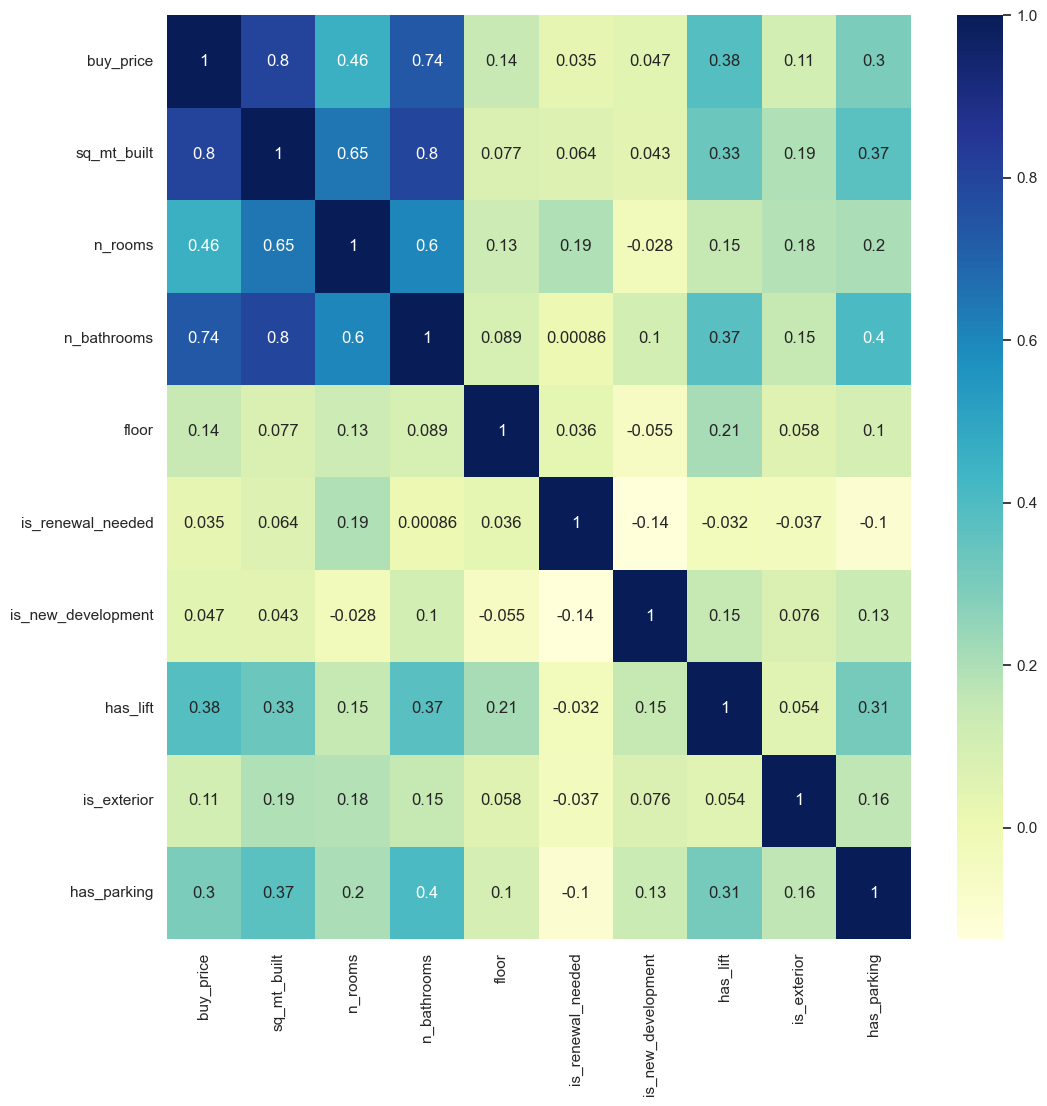

In [169]:
madrid_df2 = madrid_df.drop(columns=['has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'is_accessible', 'has_green_zones', 'rent_price'])

selected_columns = ['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_renewal_needed','is_new_development', 'has_lift', 'is_exterior', 'has_parking']

corr_matrix = madrid_df2[selected_columns].corr()

sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
sns.set(rc = {'figure.figsize': (20,20)})

In [170]:
madrid_df2.isnull().sum()

sq_mt_built              0
n_rooms                  0
n_bathrooms              0
floor                    0
neighborhood_id          0
buy_price                0
house_type_id            0
is_renewal_needed        0
is_new_development     918
has_lift              1101
is_exterior           1738
has_parking              0
dtype: int64

In [171]:
##I still have some null values. As there are not many I proceed to replace the values with the mean values

mean_exterior = madrid_df2['is_exterior'].mean()
mean_develop = madrid_df2['is_new_development'].mean()
mean_has_lift = madrid_df2['has_lift'].mean()

print(mean_exterior)
print(mean_develop)
print(mean_has_lift)

0.8991774248828973
0.07655789588562698
0.7559389296147274


In [172]:
madrid_df2['is_exterior'].fillna(1, inplace=True)
madrid_df2['is_new_development'].fillna(0, inplace=True)
madrid_df2['has_lift'].fillna(1, inplace=True)

In [173]:
madrid_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19244 entries, 0 to 21741
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sq_mt_built         19244 non-null  float64
 1   n_rooms             19244 non-null  int64  
 2   n_bathrooms         19244 non-null  float64
 3   floor               19244 non-null  float64
 4   neighborhood_id     19244 non-null  object 
 5   buy_price           19244 non-null  Int32  
 6   house_type_id       19244 non-null  object 
 7   is_renewal_needed   19244 non-null  int64  
 8   is_new_development  19244 non-null  float64
 9   has_lift            19244 non-null  float64
 10  is_exterior         19244 non-null  float64
 11  has_parking         19244 non-null  int64  
dtypes: Int32(1), float64(6), int64(3), object(2)
memory usage: 1.9+ MB


In [174]:
##As the dataset above looks clean I proceed to get_dummies for categorical values
madrid_df3 = pd.get_dummies(madrid_df2)

## Main Insights

Some columns were selected to review if they are important to include in the model or leave them behind. House type and Neighborhood will be included regardless. The final dataset contains no null values, which it was certanly a priority and therefore the task can continue. 

## Building the Price Prediction Model: Machine Learning Development

With the data ready to be processed.The dataset will be splited in training and testing set to then, evaluate performance of each model.

The following models will be explored:

1. KNeighborsRegressor 
2. DecisionTreeRegressor 
3. CatBoostRegressor 
4. RandomForestRegressor 
5. LinearRegression 
6. DummyRegressor

In [182]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import math

X = madrid_df3.drop(columns=['buy_price'])
y = madrid_df3['buy_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
 
models = [KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, CatBoostRegressor, LinearRegression, DummyRegressor]

scores = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

for model in models:
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    if model == CatBoostRegressor:
        s = model_selection.cross_validate(cls, X_train, y_train, scoring=scores, cv=kfold, 
                                           return_train_score = False, verbose=False)
    else:
        s = model_selection.cross_validate(cls, X_train, y_train, scoring=scores, cv=kfold)
    mse = s['test_neg_mean_squared_error'].mean() * -1
    rmse = math.sqrt(mse)
    print(
        f"{model.__name__:22} Fit Time: "
        f"{s['fit_time'].mean():.3f}s  R2: "
        f"{s['test_r2'].mean():.3f}  MAE: "
        f"{s['test_neg_mean_absolute_error'].mean() * -1:.3f}  RMSE: "
        f"{rmse:.3f}"
    )

KNeighborsRegressor    Fit Time: 0.016s  R2: 0.753  MAE: 115093.289  RMSE: 183344.125
DecisionTreeRegressor  Fit Time: 0.167s  R2: 0.801  MAE: 86689.858  RMSE: 164486.410
RandomForestRegressor  Fit Time: 9.353s  R2: 0.890  MAE: 69417.537  RMSE: 122176.582
Learning rate set to 0.061394
0:	learn: 353782.2645936	total: 1.93ms	remaining: 1.93s
1:	learn: 339913.4152862	total: 3.44ms	remaining: 1.71s
2:	learn: 327016.5113654	total: 4.75ms	remaining: 1.58s
3:	learn: 315018.2841304	total: 6.12ms	remaining: 1.52s
4:	learn: 303966.2074492	total: 7.5ms	remaining: 1.49s
5:	learn: 293764.2636622	total: 8.79ms	remaining: 1.46s
6:	learn: 283738.7053890	total: 10.1ms	remaining: 1.43s
7:	learn: 274999.3414204	total: 11.4ms	remaining: 1.42s
8:	learn: 267222.0662119	total: 12.9ms	remaining: 1.42s
9:	learn: 259882.2655749	total: 14.2ms	remaining: 1.4s
10:	learn: 252814.1623173	total: 15.5ms	remaining: 1.39s
11:	learn: 246507.1632110	total: 16.7ms	remaining: 1.38s
12:	learn: 240686.6818367	total: 18ms	rema

In [ ]:
CatBoostRegressor

### 12. First Insight on Models' Performance

The results above show that the best model is CatBoostRegressor. Although it is the best model as it has the highest R2 and lower MAE and RMSE, it also takes one of the longest time and consumes the most RAM out of all models. 

Consequently, there will be performed an exploration to improve those models that consume less resources and see if they are fit for the data. In case this is not possible, CatBoostRegressor will be selected as it is the most effective.

In [176]:
params = [{'n_estimators': [1, 3, 5, 10, 50, 100, 1000]}]

r_grid = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=params,
                           cv=5,
                           verbose=0)

r_grid.fit(X_train, y_train)

print("Best Parameters:", r_grid.best_params_)
print("Best Score:", r_grid.best_score_)

Best Parameters: {'n_estimators': 1000}
Best Score: 0.8877483315019518


In [177]:
params = [{'n_neighbors': [3,5,7,9,11,15]}]

k_grid = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid=params,
                      cv=5,
                      verbose=0)

k_grid.fit(X_train, y_train)

print("Best Parameters:", k_grid.best_params_)
print("Best Score:", k_grid.best_score_)

Best Parameters: {'n_neighbors': 5}
Best Score: 0.7487226456335474


In [178]:
params = [{'max_depth': [10, 100, 500, 1000, 2000]}]

d_grid = GridSearchCV(estimator=DecisionTreeRegressor(),
                      param_grid=params,
                      cv=5)

d_grid.fit(X_train, y_train)

print("Best Parameters:", d_grid.best_params_)
print("Best Score:", d_grid.best_score_)

Best Parameters: {'max_depth': 100}
Best Score: 0.7996682244684713


In [179]:
params = [{'depth': [2, 4, 6, 8, 10],
          'verbose': [False]}]

c_boost = GridSearchCV(estimator=CatBoostRegressor(),
                       param_grid=params,
                       cv=5,
                       )

c_boost.fit(X_train, y_train)

print("Best Parameters:", c_boost.best_params_)
print("Best Score:", c_boost.best_score_)

Best Parameters: {'depth': 10, 'verbose': False}
Best Score: 0.9108022630871495


### 13. Hypertuning

In [183]:
params = [{'depth': [8,10,12,14,20],
          'verbose': [False],
          'iterations':[700, 1000, 1500, 2000]}]

c_boost = GridSearchCV(estimator=CatBoostRegressor(),
                       param_grid=params,
                       cv=5,
                       )

c_boost.fit(X_train, y_train)

print("Best Parameters:", c_boost.best_params_)
print("Best Score:", c_boost.best_score_)

Best Parameters: {'depth': 8, 'iterations': 2000, 'verbose': False}
Best Score: 0.91226816600275


### 14. Model Selection

The model ultimately will be CatBoostRegressor.

The depth will be 10, with iterations to 1000. Verbose, is selected to avoid having the learning process displayed. 

In [194]:
##Althought depth was 8 and iterations was 2000, I have selected 10 and 1000 as I've seen it performed better.

c_boost = CatBoostRegressor(iterations=1000, depth=10, verbose=False)

c_boost.fit(X_test, y_test)

y_pred= c_boost.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

cv_scores = cross_val_score(c_boost, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

R^2 Score: 0.9723536049035706
Cross-Validation Scores: [0.76265145 0.82590545 0.84149635 0.81936317 0.66873394]
Mean Cross-Validation Score: 0.7836300745254973


### 15. Actual vs Predictions

In the graph below, the reader will observe the target values represented by blue dots, indicating the actual outcomes, while the red dots represent the model's predictions.

A mean difference of 12% is noted between the target and prediction values. Notably, there's an observable trend of increasing residuals as the target prices rise. This suggests a potential need to recalibrate the model's predictions, particularly for high-end properties. Adjusting prediction methodology for properties in the upper scale could enhance the accuracy and reliability of the pricing forecasts.

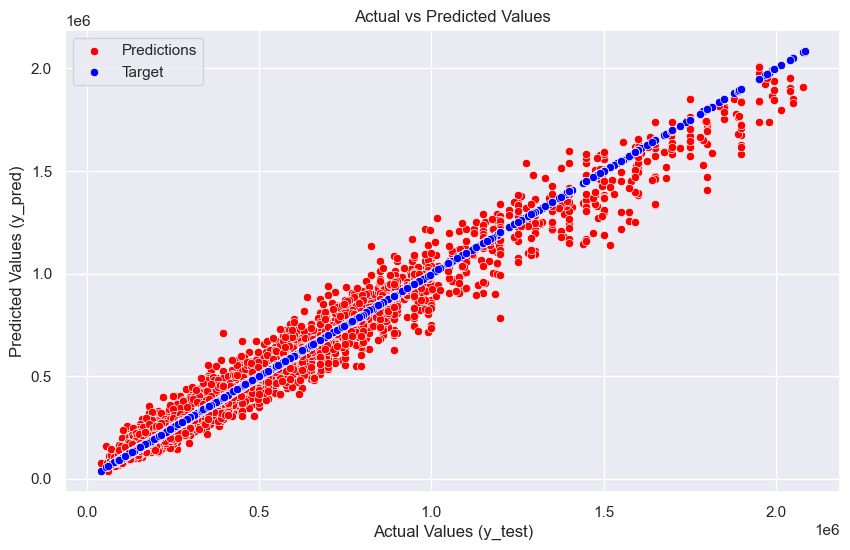

In [195]:
predvstarget = pd.DataFrame({'Predictions': y_pred})

y_test = y_test.reset_index(drop=True)

predvstarget['Target'] = y_test

predvstarget['Residual'] = predvstarget['Target'] - predvstarget['Predictions']

predvstarget['Difference%'] = np.absolute(predvstarget['Residual']/predvstarget['Target']*100)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=predvstarget, x='Target', y='Predictions', color='red', label='Predictions')
sns.scatterplot(data=predvstarget, x='Target', y='Target', color='blue', label='Target')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

plt.show()

In [196]:
predvstarget['Difference%'].mean()

12.075731370177222

In [197]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


### 16. Model's Behaviour

The model has shown good performance, achieving 97% accuracy during testing and maintaining approximately 80% efficacy with the actual data. Such results underscore its reliability and effectiveness.

For both the reader and myself, it's important to understand the influence of individual features on the prediction and outcome. Leveraging the SHAP library, the relationship between each feature can be uncovered as well as model's decision-making process.

This step can be used to improve the model and optimize its performance.

In [198]:
import shap

explainer = shap.TreeExplainer(c_boost)
shap_values = explainer(X_train)

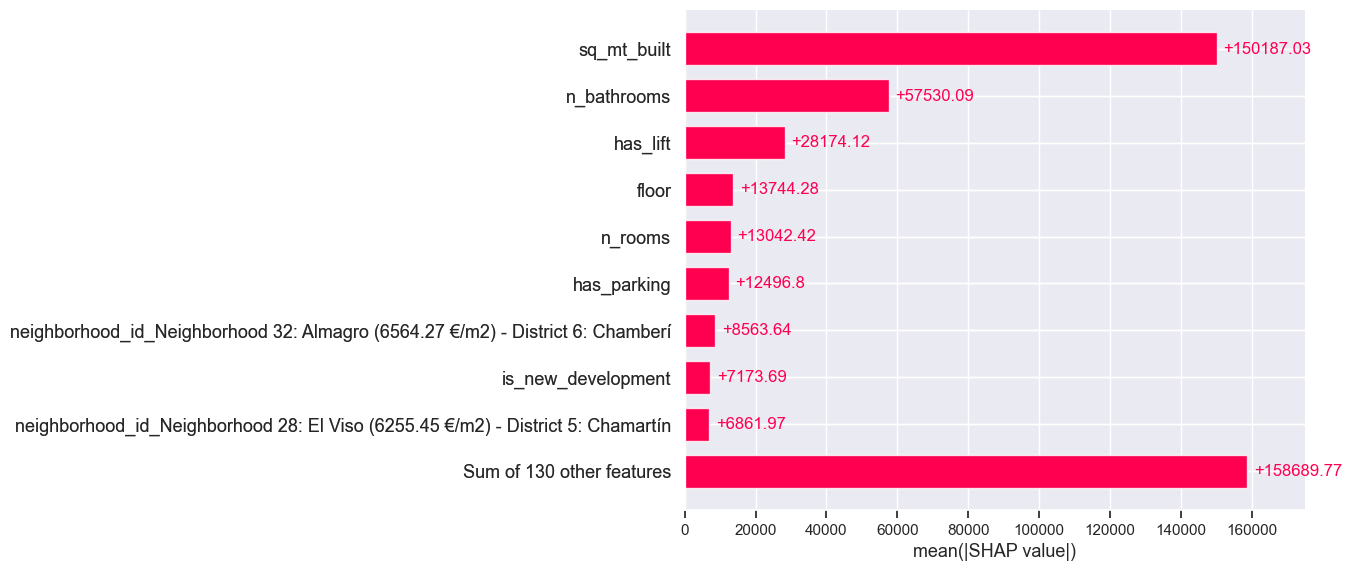

In [199]:
shap.plots.bar(shap_values)

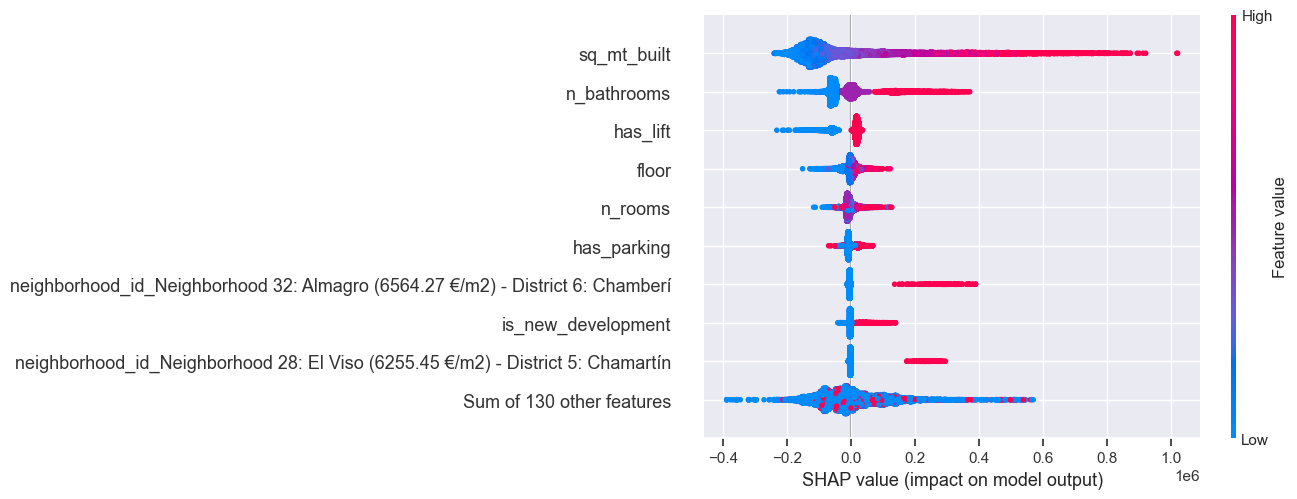

In [200]:
shap.plots.beeswarm(shap_values)

## Conclusions

Throughout the process, the necessary steps for a professional analysis were folowed, additionally it was tried different models to choose the best performer for the data presented. 

The process has been divided into three main areas. Firstly it was performed a data exploration and cleaning. This process involved dropping duplicates, variables that were not important, dropping outliers and null values. With a cleaner data set, the second part was carried out which included analysing what variables could be important through graphs and data modelling. 

Finally, techniques were implemented to select the best model out of 5. At this stage metrics such as Fit Time, R2, MAE and RMSE were the ones that determined the scoring for selection. CatBoostRegressor was the chosen model and hyper tunning techniques were deployed to improve performance. 

Having the best scores, it was determined that seeing the model's behaviour was crucial as there was a need to understand if the model followed business patterns that I had known in advance. It was observed that the AVG. residual was 12%, where the model performed lower with higher property values. In contrast, the model performed better in the lower end, where the majority of the Madrid properties are laid. It is important to highlight in this part that if the model is deployed, it's advisable that properties over 1M, which are not the most common in Madrid, would have to be checked by humans before presenting the result to the client.

Furthermore, the SHAP library was selected to understand the model's behaviour. The two graphs above show what variables are the most important to the result. Sqm is the most important variable, which is not surprising. Additionally, the reader can see that property features such as the number of rooms or bathrooms are present as well as premium neighbourhoods. Perhaps the reader would find surprisingly that bathrooms are an important variable, however number of bathrooms is directly correlated to the size of the property. In addition, there are properties underground that can determine the price.

Addressing the initial hypothesis:

1. The value of the property is determined by its location: **Yes**
2. Having built-in wardrobes increases the price: **No**
3. If the property has a pool, the price increases considerably: **Not determined as not many properties in Madrid have pools**
4. The price of exterior properties is 30% higher than interior properties: **Yes, the price increases (seen in corr_map)**
5. Properties with an elevator increase the price by 20%: **Yes it was a feature highlighted by the model**
6. Having balconies significantly increases the price: **Not determined**
7. Having more rooms increases the price of the property: **Yes another important variable in the model.**
8. The size of the property determines its price: **Yes, the most important variable**

In conclusion, this model holds promise as a valuable tool for attracting clients and supporting businesses. However, it is essential for human to validate the final price before presentation. Additionally, it's important to acknowledge the diverse conditions of properties and the subjective nature of human perception. While one person may perceive an apartment as being in good condition, another may think it needs of renovation. To address this variability, a potential solution could involve providing a price range and determining a final price after conducting an in-person property visit.